In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
% matplotlib inline

In [9]:
rs = np.random.RandomState(42)
n = 200
X = np.array([np.concatenate((rs.randn(n//2) + 5, rs.randn(n//2) - 5)),
                        rs.randn(n)])
y = np.concatenate((np.ones(n//2), - np.ones(n//2)))
y[:3] = -1
y[n//2:n//2 + 3] = 1
X[1, :3] += 5
X[1, n//2:n//2 + 3] -= 5
print(X.shape)

(2, 200)


In [7]:
p_rs = np.random.RandomState(15)
# theta = p_rs.normal(0, 0.01, n)
theta = np.zeros(n)
b = 0

def f_th(x):
    global theta, b, X
    return x @ X @ theta + b

def sub_diff(i, k):
    """Sub-differentiate by k_th theta"""
    global theta, b, X, y
    if 1 - y[i] * f_th(X[:, i]) > 0:
        return - y[i] * np.matmul(X[:, k], X[:, i])
    else:
        return 0
    
def sub_diff_b(i):
    """Sub-differentiate by b"""
    global theta, b, X, y
    if 1 - y[i] * f_th(X[:, i]) > 0:
        return - y[i]
    else:
        return 0
    
def update_theta(k, lamb=0.01):
    """Return update for k_th theta"""
    global theta, n
    val = lamb * theta[k]
    for i in range(n):
        val += sub_diff(i, k)
    return val

def update_b():
    """Return update for b"""
    global n
    val = 0
    for i in range(n):
        val += sub_diff_b(i)
    return val
        
iter_num = 200
for l in range(iter_num):
    if l % 50 == 0:
        print(l, X @ theta)
    eps = 0.1
    new_theta = np.copy(theta)
    for i, t in enumerate(theta):
        new_theta[i] -= eps * update_theta(i)
    b -= eps * update_b()
    theta = new_theta
    
w = X @ theta    
print(w)

0 [ 0.  0.]
50 [ 22651.56170768 -29664.48048388]
100 [ 21546.2929838  -28217.02079381]
150 [ 20494.95515297 -26840.18899002]
[ 19494.91669115 -25530.53882918]


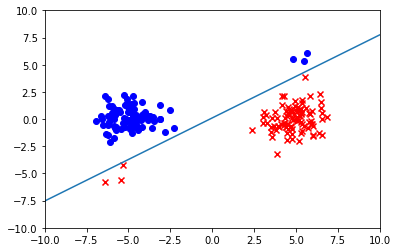

In [8]:
plt.scatter(X[0, np.where(Y==1)], X[1, np.where(Y==1)], c='r', marker='x')
plt.scatter(X[0, np.where(Y==-1)], X[1, np.where(Y==-1)], c='b', marker='o')
_x = np.linspace(-10, 10)
plt.plot(_x, b - _x * w[0] / w[1])
plt.ylim(-10, 10)
plt.xlim(-10, 10)
plt.show()

In [2]:
Y

NameError: name 'Y' is not defined